In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
import statsmodels.formula.api as smf
from statsmodels.stats import anova
from patsy import dmatrices
import bff
# Plotting packages
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]
from sklearn.preprocessing import StandardScaler

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 120

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]
cust_palette=sns.color_palette("Set2",2)


Autosaving every 120 seconds


In [4]:
# Load file (from same directory as the notebook)
df = pd.read_excel(os.path.expanduser("df.xlsx"))
df.head()

,PercentF,PercentM,POST_salary,POST_friendly,POST_intelligent,Hire,Choice,itemnum,partnum,TimePoint,Condition
0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,PRE,Man
1,1,0,NaN,NaN,NaN,NaN,NaN,1,0,PRE,Man
2,0,1,NaN,NaN,NaN,NaN,NaN,0,1,PRE,Man
3,1,0,NaN,NaN,NaN,NaN,NaN,1,1,PRE,Man
4,0,1,NaN,NaN,NaN,NaN,NaN,0,2,PRE,Man


<IPython.core.display.Javascript object>


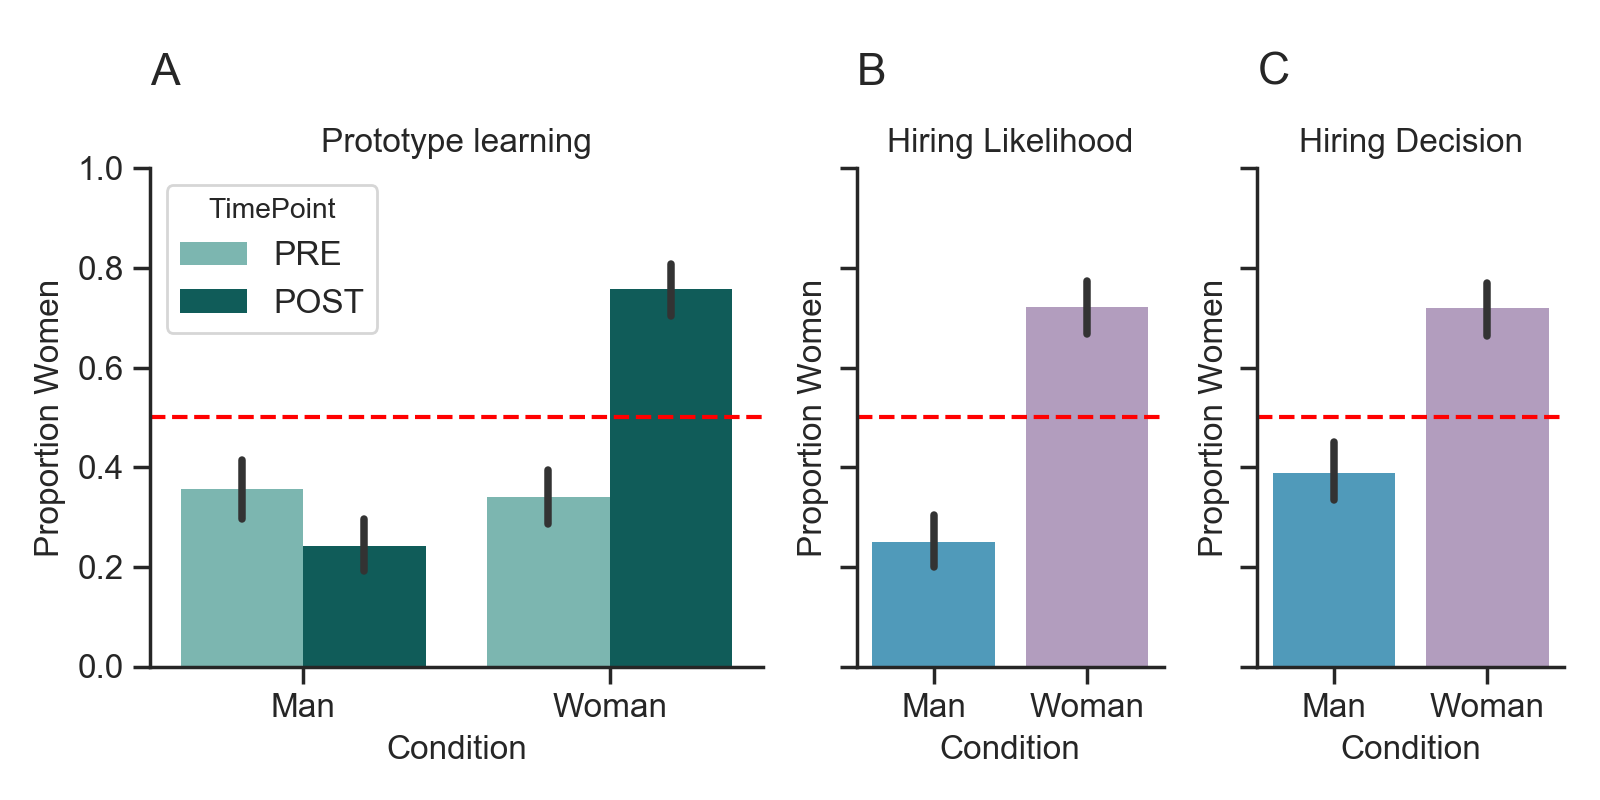

In [5]:
colors = ["#3EA1CC","#B497C4"]
colorspp = ["#72C0B7","#046865"]

fig, ax = plt.subplots(1,3, figsize=(8,4), sharey=True, gridspec_kw={"width_ratios": [2,1,1]})
sns.barplot(x='Condition', y="PercentF", hue='TimePoint', data=df, \
            palette=colorspp, linewidth = 0, edgecolor=".2", errcolor=".2", \
            ax=ax[0]) 
ax[0].set_ylabel("Proportion Women")
ax[0].set_xlabel("Condition")
ax[0].set_title("Prototype Learning")

sns.barplot(x='Condition', y='Hire', data=df, \
            palette=colors, linewidth = 0, edgecolor=".2", errcolor=".2", \
            ax=ax[1]) 
sns.barplot(x='Condition', y='Choice', data=df, \
            palette=colors, linewidth = 0, edgecolor=".2", errcolor=".2", \
            ax=ax[2]) 

ax[1].set_ylabel("Proportion Women", labelpad=10)
ax[1].set_title("Hiring Likelihood")
ax[1].set_xlabel("Condition")

ax[2].set_ylabel("Proportion Women", labelpad=10)
ax[2].set_title("Hiring Choice")
ax[2].set_xlabel("Condition")

bff.panellabel(ax[0], "A", title="Prototype learning")
bff.panellabel(ax[1], "B", title="Hiring Likelihood")
bff.panellabel(ax[2], "C", title="Hiring Decision")

ax[0].axhline(y=0.5, color='#FF0000', linestyle='--')
ax[1].axhline(y=0.5, color='#FF0000', linestyle='--')
ax[2].axhline(y=0.5, color='#FF0000', linestyle='--')


plt.ylim(0,1)
sns.despine()
plt.tight_layout()

In [7]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython
# %R library(lme4)

%R library(lmerTest)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['lmerTest', 'lme4', 'Matrix', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [8]:
%Rpush df

In [58]:
%%R

M <- glmer(Choice ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Choice ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 677.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6883 -0.9764  0.4638  0.7468  1.4586 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.000000 0.00000 
 itemnum  (Intercept) 0.009422 0.09707 
 Residual             0.215928 0.46468 
Number of obs: 511, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error t value
(Intercept)     0.38798    0.07455   5.204
ConditionWoman  0.33077    0.04111   8.046

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.276
convergence code: 0
boundary (singular) fit: see ?isSingular



In [59]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: Choice
             Chisq Df Pr(>Chisq)    
(Intercept) 27.084  1  1.948e-07 ***
Condition   64.730  1  8.589e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
%%R

M <- glmer(Hire ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Hire ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 618.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7639 -0.6849 -0.4565  0.7473  1.8264 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 partnum  (Intercept) 8.305e-11 9.113e-06
 itemnum  (Intercept) 5.667e-03 7.528e-02
 Residual             1.919e-01 4.380e-01
Number of obs: 512, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error t value
(Intercept)     0.25000    0.05986   4.177
ConditionWoman  0.47266    0.03872  12.208

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.323
convergence code: 0
boundary (singular) fit: see ?isSingular



In [57]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: Hire
              Chisq Df Pr(>Chisq)    
(Intercept)  17.444  1  2.959e-05 ***
Condition   149.030  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [9]:
%%R

M <- glmer(Choice ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: Choice ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 677.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6883 -0.9764  0.4638  0.7468  1.4586 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.000000 0.00000 
 itemnum  (Intercept) 0.009422 0.09707 
 Residual             0.215928 0.46468 
Number of obs: 511, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error t value
(Intercept)     0.38798    0.07455   5.204
ConditionWoman  0.33077    0.04111   8.046

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.276
convergence code: 0
boundary (singular) fit: see ?isSingular



In [10]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: Choice
             Chisq Df Pr(>Chisq)    
(Intercept) 27.084  1  1.948e-07 ***
Condition   64.730  1  8.589e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
%%R

M <- lmer(POST_intelligent ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_intelligent ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4186.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8558 -0.3063  0.1312  0.4453  3.9663 

Random effects:
 Groups   Name        Variance  Std.Dev.
 partnum  (Intercept) 3.141e+02 17.72378
 itemnum  (Intercept) 2.948e-04  0.01717
 Residual             1.276e+02 11.29737
Number of obs: 506, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)     76.0381     1.7199 150.6667  44.212   <2e-16 ***
ConditionWoman   0.5377     1.0062 377.2540   0.534    0.593    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.291
convergence code: 0
Model failed to converge with max|grad| = 0.0235248 (tol = 0.002, component 1)



In [20]:
%%R

M <- lmer(POST_friendly ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_friendly ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4329.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9562 -0.4305  0.0645  0.5410  2.7844 

Random effects:
 Groups   Name        Variance  Std.Dev.
 partnum  (Intercept) 290.59265 17.0468 
 itemnum  (Intercept)   0.07949  0.2819 
 Residual             176.51165 13.2858 
Number of obs: 509, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)      71.735      1.734  44.294  41.372   <2e-16 ***
ConditionWoman    1.283      1.179 379.296   1.089    0.277    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.341


In [11]:
%%R

M <- lmer(POST_salary ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_salary ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4413.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8842 -0.5544 -0.0546  0.5105  3.2782 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 205.550  14.337  
 itemnum  (Intercept)   3.368   1.835  
 Residual             222.670  14.922  
Number of obs: 512, groups:  partnum, 128; itemnum, 2

Fixed effects:
               Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)      57.930      2.040   3.933  28.403 1.06e-05 ***
ConditionWoman   -1.957      1.319 382.124  -1.484    0.139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.323
convergence code: 0
Model failed to converge with max|grad| = 0.0217496 (tol = 0.002, component 1)



In [47]:
# Load file (from same directory as the notebook)
df_m = pd.read_excel(os.path.expanduser("df_male.xlsx"))
df_m.head()

,PercentF,PercentM,POST_salary,POST_friendly,POST_intelligent,Hire,Choice,itemnum,partnum,TimePoint,Condition
0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,PRE,Man
1,1,0,NaN,NaN,NaN,NaN,NaN,1,0,PRE,Man
2,0,1,NaN,NaN,NaN,NaN,NaN,0,1,PRE,Man
3,1,0,NaN,NaN,NaN,NaN,NaN,1,1,PRE,Man
4,0,1,NaN,NaN,NaN,NaN,NaN,0,2,PRE,Man


In [48]:
# Load file (from same directory as the notebook)
df_f = pd.read_excel(os.path.expanduser("df_female.xlsx"))
df_f.head()

,PercentF,PercentM,POST_salary,POST_friendly,POST_intelligent,Hire,Choice,itemnum,partnum,TimePoint,Condition
0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,PRE,Woman
1,1,0,NaN,NaN,NaN,NaN,NaN,1,0,PRE,Woman
2,1,0,NaN,NaN,NaN,NaN,NaN,0,1,PRE,Woman
3,0,1,NaN,NaN,NaN,NaN,NaN,1,1,PRE,Woman
4,0,1,NaN,NaN,NaN,NaN,NaN,0,2,PRE,Woman


In [50]:
%Rpush df_m

In [51]:
%Rpush df_f

In [54]:
%%R

M <- glmer(PercentM ~ TimePoint  + (1|partnum) + (1|itemnum), data = df_f)
print(summary(M))

Linear mixed model fit by REML ['lmerMod']
Formula: PercentM ~ TimePoint + (1 | partnum) + (1 | itemnum)
   Data: df_f

REML criterion at convergence: 647.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6565 -0.6103 -0.4253  0.7956  1.7493 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.009487 0.09740 
 itemnum  (Intercept) 0.001445 0.03801 
 Residual             0.194566 0.44110 
Number of obs: 512, groups:  partnum, 128; itemnum, 2

Fixed effects:
             Estimate Std. Error t value
(Intercept)   0.24219    0.03945   6.139
TimePointPRE  0.41797    0.03899  10.721

Correlation of Fixed Effects:
            (Intr)
TimePontPRE -0.494


In [55]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: PercentM
              Chisq Df Pr(>Chisq)    
(Intercept)  37.682  1  8.327e-10 ***
TimePoint   114.929  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
%%R

M <- glmer(PercentM ~ TimePoint  + (1|partnum) + (1|itemnum), data = df_m)
print(summary(M))

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: PercentM ~ TimePoint + (1 | partnum) + (1 | itemnum)
   Data: df_m

REML criterion at convergence: 647.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8027 -1.2234  0.5263  0.7194  1.1764 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.02287  0.1512  
 itemnum  (Intercept) 0.00000  0.0000  
 Residual             0.18435  0.4294  
Number of obs: 512, groups:  partnum, 128; itemnum, 2

Fixed effects:
             Estimate Std. Error t value
(Intercept)   0.75781    0.02998  25.278
TimePointPRE -0.11328    0.03795  -2.985

Correlation of Fixed Effects:
            (Intr)
TimePontPRE -0.633
convergence code: 0
boundary (singular) fit: see ?isSingular



In [53]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: PercentM
               Chisq Df Pr(>Chisq)    
(Intercept) 638.9555  1  < 2.2e-16 ***
TimePoint     8.9099  1   0.002836 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
